In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import simple_angles_dataset_generator as simple_angles_gen
from mcu_original import MCUOriginalModel
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
import pickle

In [14]:
figure_num = 10**3
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 3
seed = 123
noise_level = 0
lw = np.array([10, -75, -75])
up = np.array([170, 75, 75])
seed = 123
param_names = np.array(["inside_angle", "rotation_angle_x", "rotation_angle_y"])
# control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
#                                                   size=figure_num,
#                                                   lw=lw, up=up, seed = seed)
# control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
# figures = dataset_generator.generate_array_of_figures(control_vars_dict, simple_angles_gen.generate_angles_points,
#                                                       noise_level=noise_level, min_num_points=figure_point_cnt)
# mcu_model = MCUOriginalModel(k=10, c=0.12, figures=figures, params=control_vars, params_names=param_names)

with open('tmp_storage/orig_angle.pkl', 'rb') as f:
    data = pickle.load(f)
mcu_model = data['model']

In [4]:
mcu_model.train(max_iters=100, do_cliques=False, keep_mutual_only=True)


                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) May 06 11:54:43 AM: Your problem has 1000000 variables, 9060 constraints, and 0 parameters.
(CVXPY) May 06 11:54:44 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 06 11:54:44 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 06 11:54:44 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 06 11:54:44 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 06 11:54:44 AM: Compiling problem (target solver=SCS

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [5]:
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")
print(f"Average number of neighbors: {mcu_model.avg_k}")
prob = mcu_model.prob
constraint_residuals = [(constraint, constraint.residual) for constraint in prob.constraints]
constraint_residuals.sort(key=lambda x: abs(x[1]), reverse=True)
print()
for i, (constraint, residual) in enumerate(constraint_residuals[:5], 1):
    print(f"{i}. Constraint: {constraint}")
    print(f"   Residual: {residual}")

rre_median_embedding_vs_params: 0.0005960277326077342
Average number of neighbors: 9.058

1. Constraint: trace(var1) <= 119.88
   Residual: 23.560498279688346
2. Constraint: trace([[1.00 1.00 ... 1.00 1.00]
 [1.00 1.00 ... 1.00 1.00]
 ...
 [1.00 1.00 ... 1.00 1.00]
 [1.00 1.00 ... 1.00 1.00]] @ var1) == 0.0
   Residual: 0.0007859865183537929
3. Constraint: var1[163, 0:1000][163] + var1[258, 0:1000][258] + -2.0 @ var1[163, 0:1000][258] == 0.09056322694925623
   Residual: 0.000332372353728988
4. Constraint: var1[258, 0:1000][258] + var1[163, 0:1000][163] + -2.0 @ var1[258, 0:1000][163] == 0.09056322694925623
   Residual: 0.000332372353728988
5. Constraint: var1[13, 0:1000][13] + var1[434, 0:1000][434] + -2.0 @ var1[13, 0:1000][434] == 0.08010061446651427
   Residual: 0.0003281826771340257


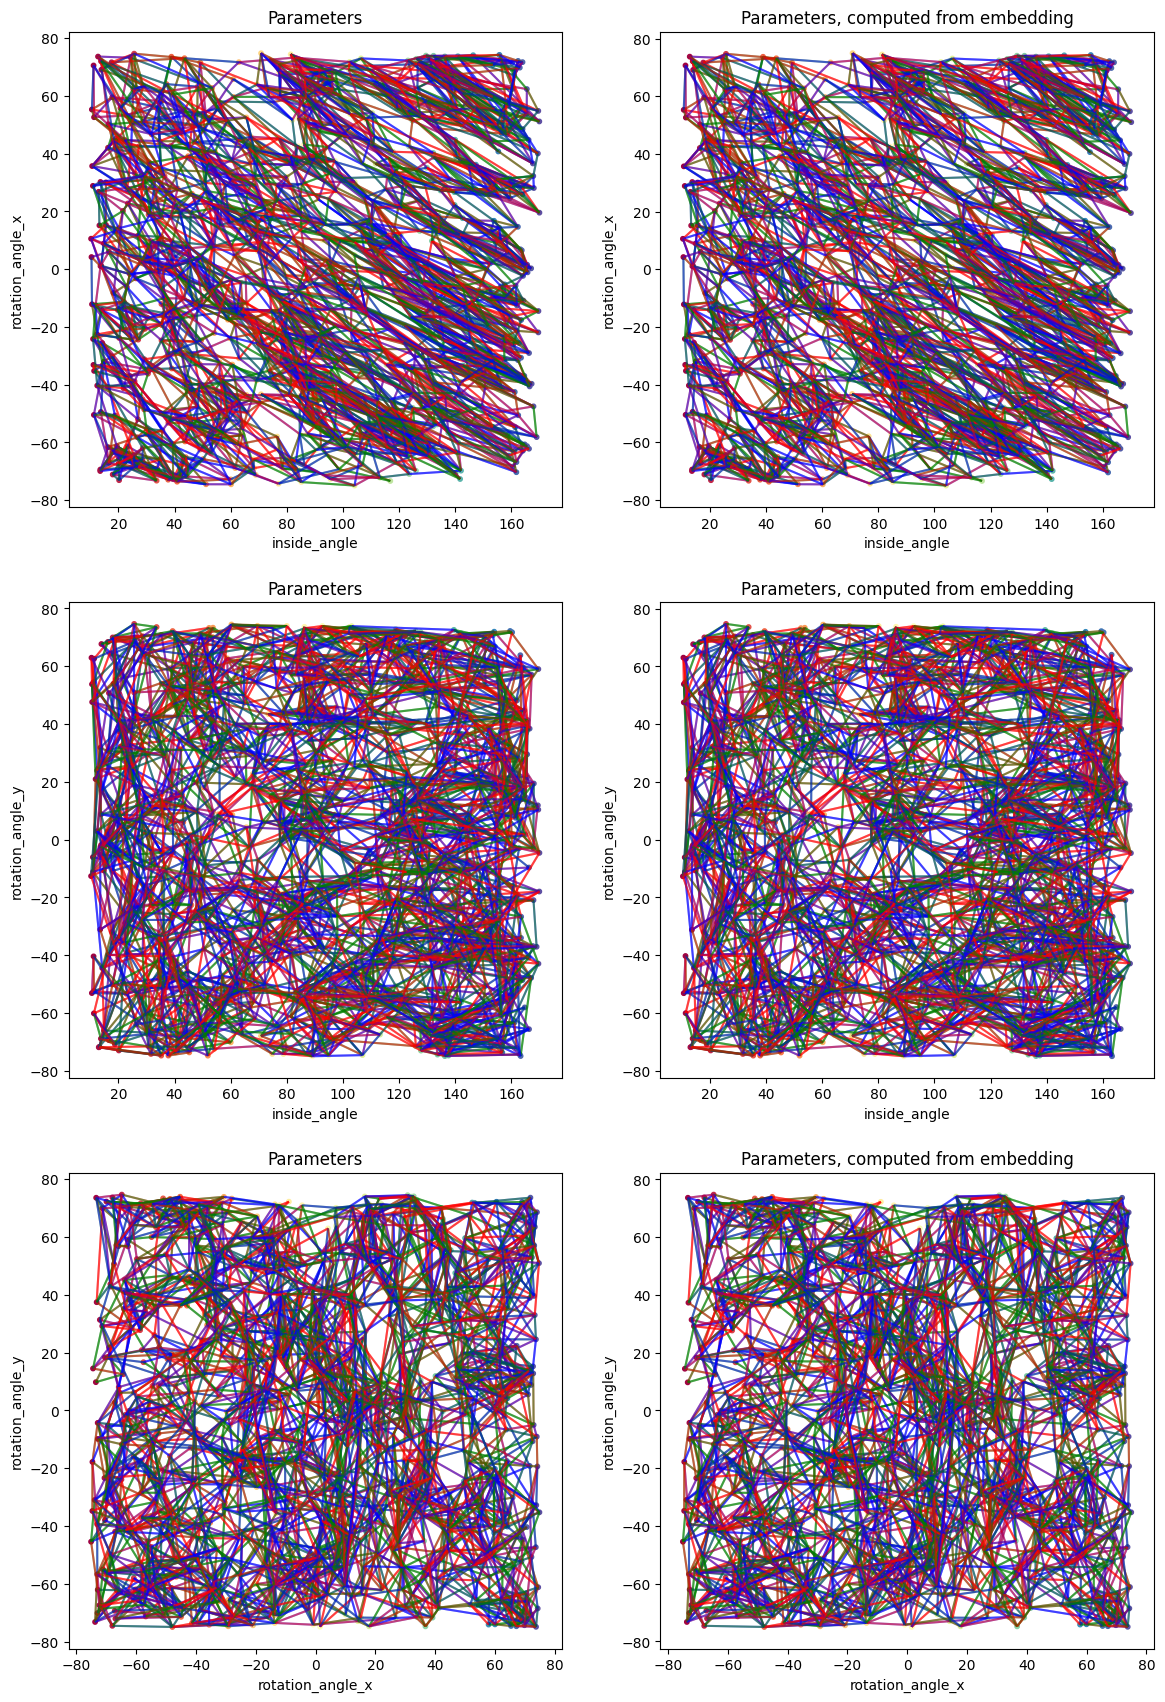

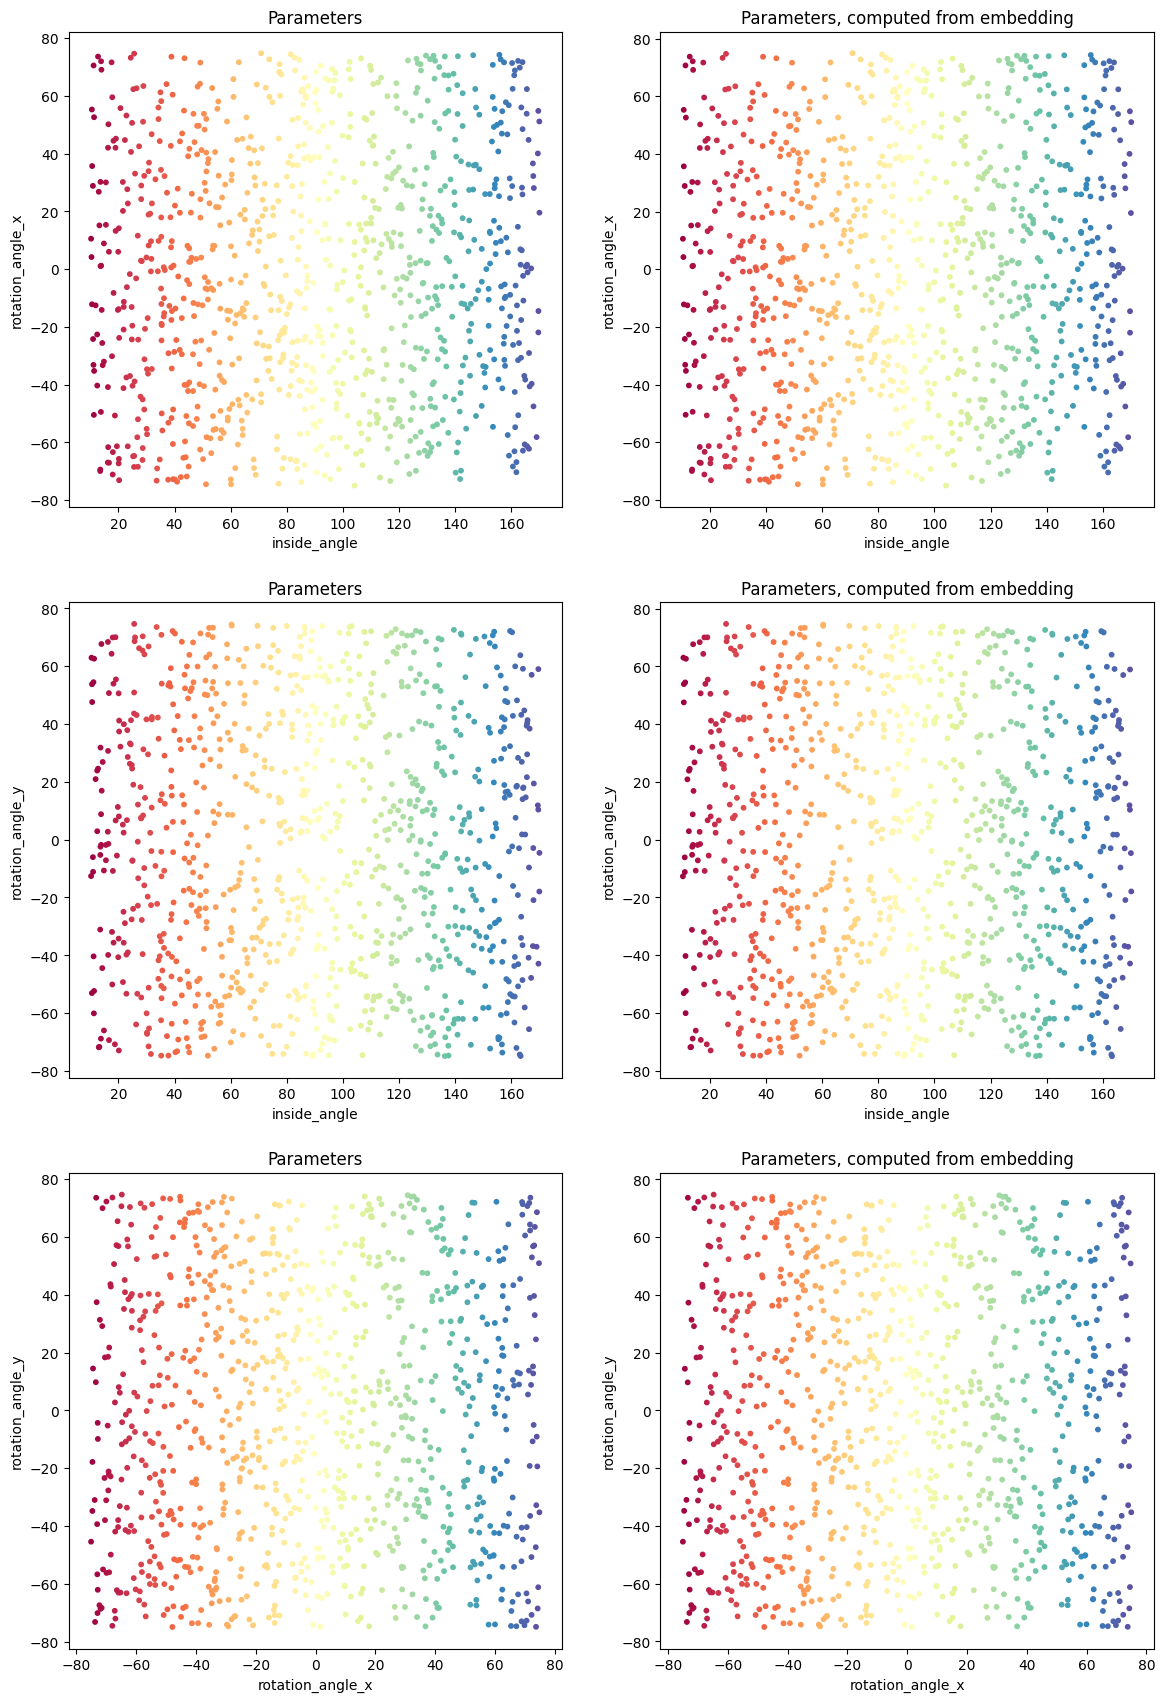

In [15]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [8]:
mcu_experiments = MCUexperiments(mcu_model)
k=4
seed=153
pieces = 5
test_size=50
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt, k=k, noise_level = 0, pieces_cnt=pieces, test_data_size=test_size, same_value=False, seed=seed)

Finding neighbors: 9 ms , optimization: 0 ms
-----------
x_opt  = [ 39.75373846 -63.05086416 -64.41219256], x_err = 0.019781195983277097
x_real = [ 39.92572079 -58.67854585 -71.67056173]
Finding neighbors: 6 ms , optimization: 0 ms
-----------
x_opt  = [ 36.01302726 -64.30079479 -45.6281195 ], x_err = 0.018336412082948804
x_real = [ 37.41110644 -63.53528358 -46.5028821 ]
Finding neighbors: 6 ms , optimization: 0 ms
-----------
x_opt  = [ 23.81499721 -58.3209646  -50.73463481], x_err = 0.03202191667302623
x_real = [ 22.33762274 -57.5652575  -47.38753632]
Finding neighbors: 6 ms , optimization: 0 ms
-----------
x_opt  = [ 17.74889171 -47.94221396 -66.61934789], x_err = 0.023247381414081076
x_real = [ 10.262487   -45.81979789 -67.99416026]
Finding neighbors: 6 ms , optimization: 0 ms
-----------
x_opt  = [ 17.42188924 -55.20525448 -64.47172632], x_err = 0.021273849075193217
x_real = [ 12.54913847 -49.80938985 -63.62271602]
Finding neighbors: 5 ms , optimization: 0 ms
-----------
x_opt  = 

In [9]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt, noise_level = 0, pieces_cnt=pieces, test_data_size=pieces, same_value=False, baseline=True, seed=seed)

-----------
x_opt  = [ 44.0005718  -65.15417752 -63.02789714], x_err = 0.09999548614492228
x_real = [ 39.92572079 -58.67854585 -71.67056173]
-----------
x_opt  = [ 34.74427654 -65.94461648 -40.36126248], x_err = 0.14712433852334203
x_real = [ 37.41110644 -63.53528358 -46.5028821 ]
-----------
x_opt  = [ 26.73687194 -58.24098903 -53.30568843], x_err = 0.11078252862046119
x_real = [ 22.33762274 -57.5652575  -47.38753632]
-----------
x_opt  = [ 13.78330855 -49.47276289 -68.83299715], x_err = 0.18348548894379657
x_real = [ 10.262487   -45.81979789 -67.99416026]
-----------
x_opt  = [ 11.27738049 -50.49853152 -60.09217251], x_err = 0.14799904351573887
x_real = [ 12.54913847 -49.80938985 -63.62271602]
errors0 = [2.54678188 1.66676869 2.74953074 2.20051347 0.79484874]
errors1 = [4.31708778 1.60622194 0.45048769 2.43531    0.45942778]
errors2 = [5.76177639 4.09441308 3.94543474 0.55922459 2.35369567]
-----------
x_opt  = [ 35.67332892 -55.89718522 -45.24876123], x_err = 0.10937332305405448
x_r

In [12]:
data = {
    'interval_runs': interval_runs,
    'intervals': intervals,
    'interval_runs_base': interval_runs_base,
    'model': mcu_model
}
with open('tmp_storage/orig_angle.pkl', 'wb') as f:
    pickle.dump(data, f)

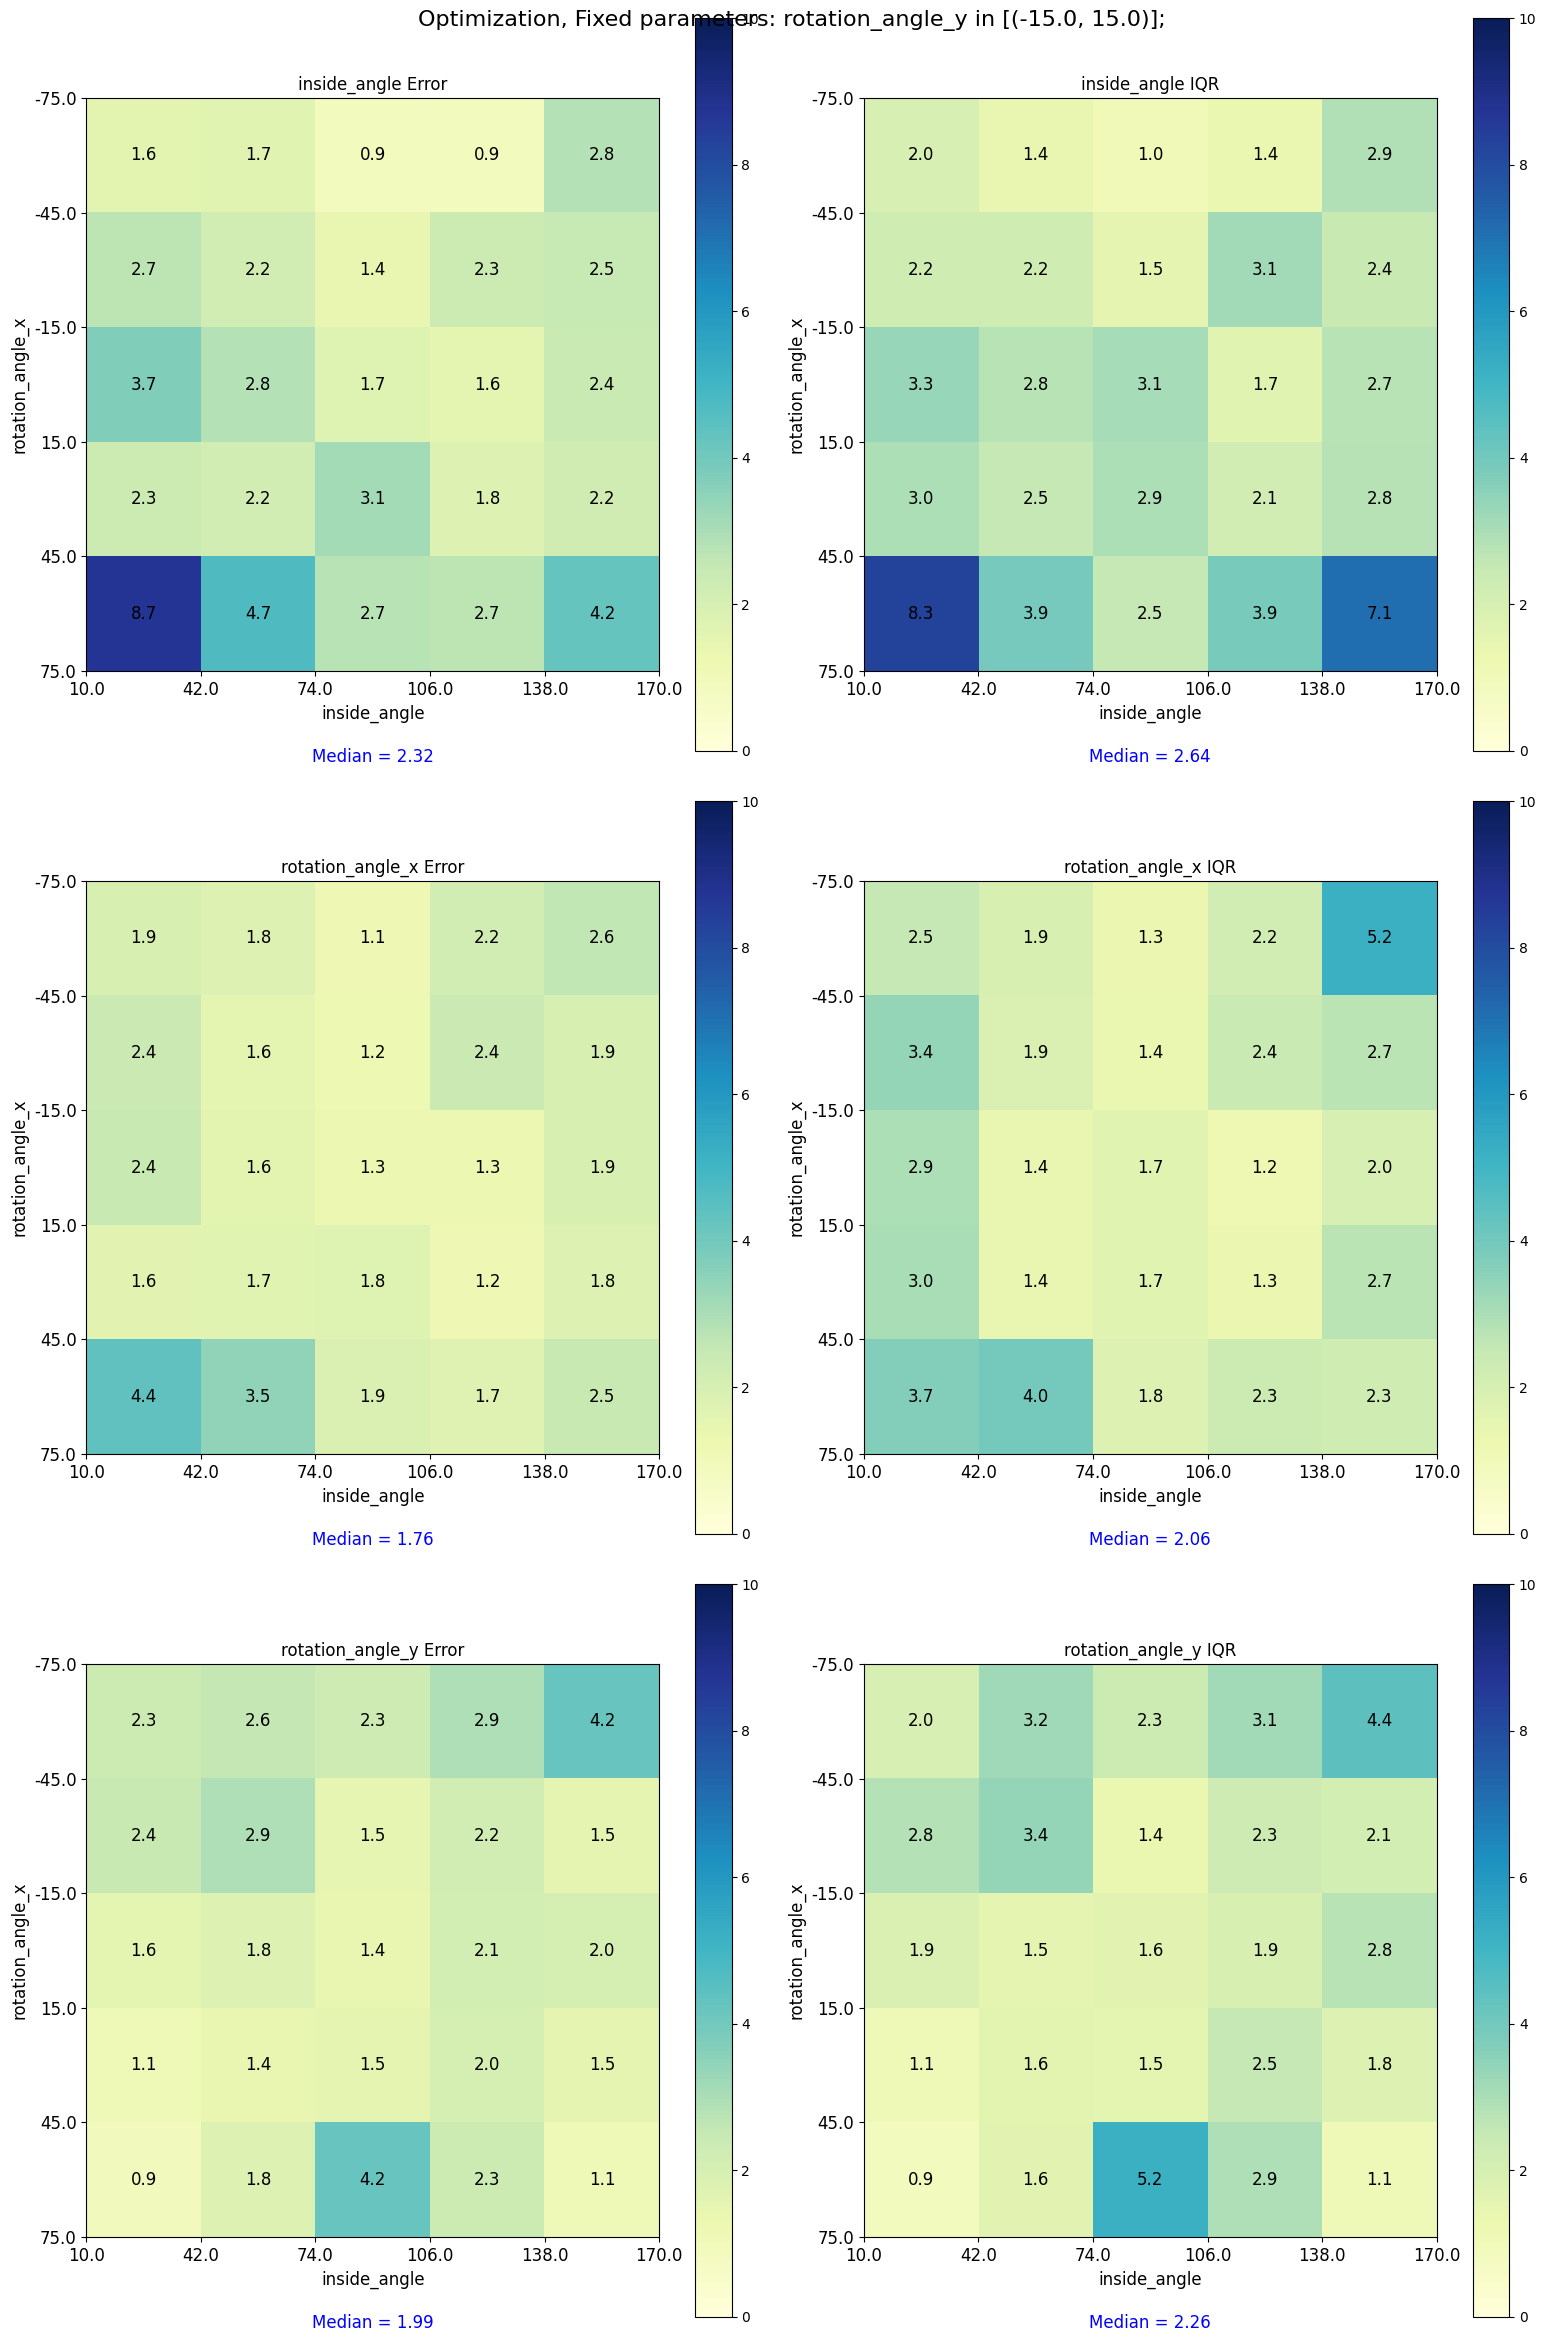

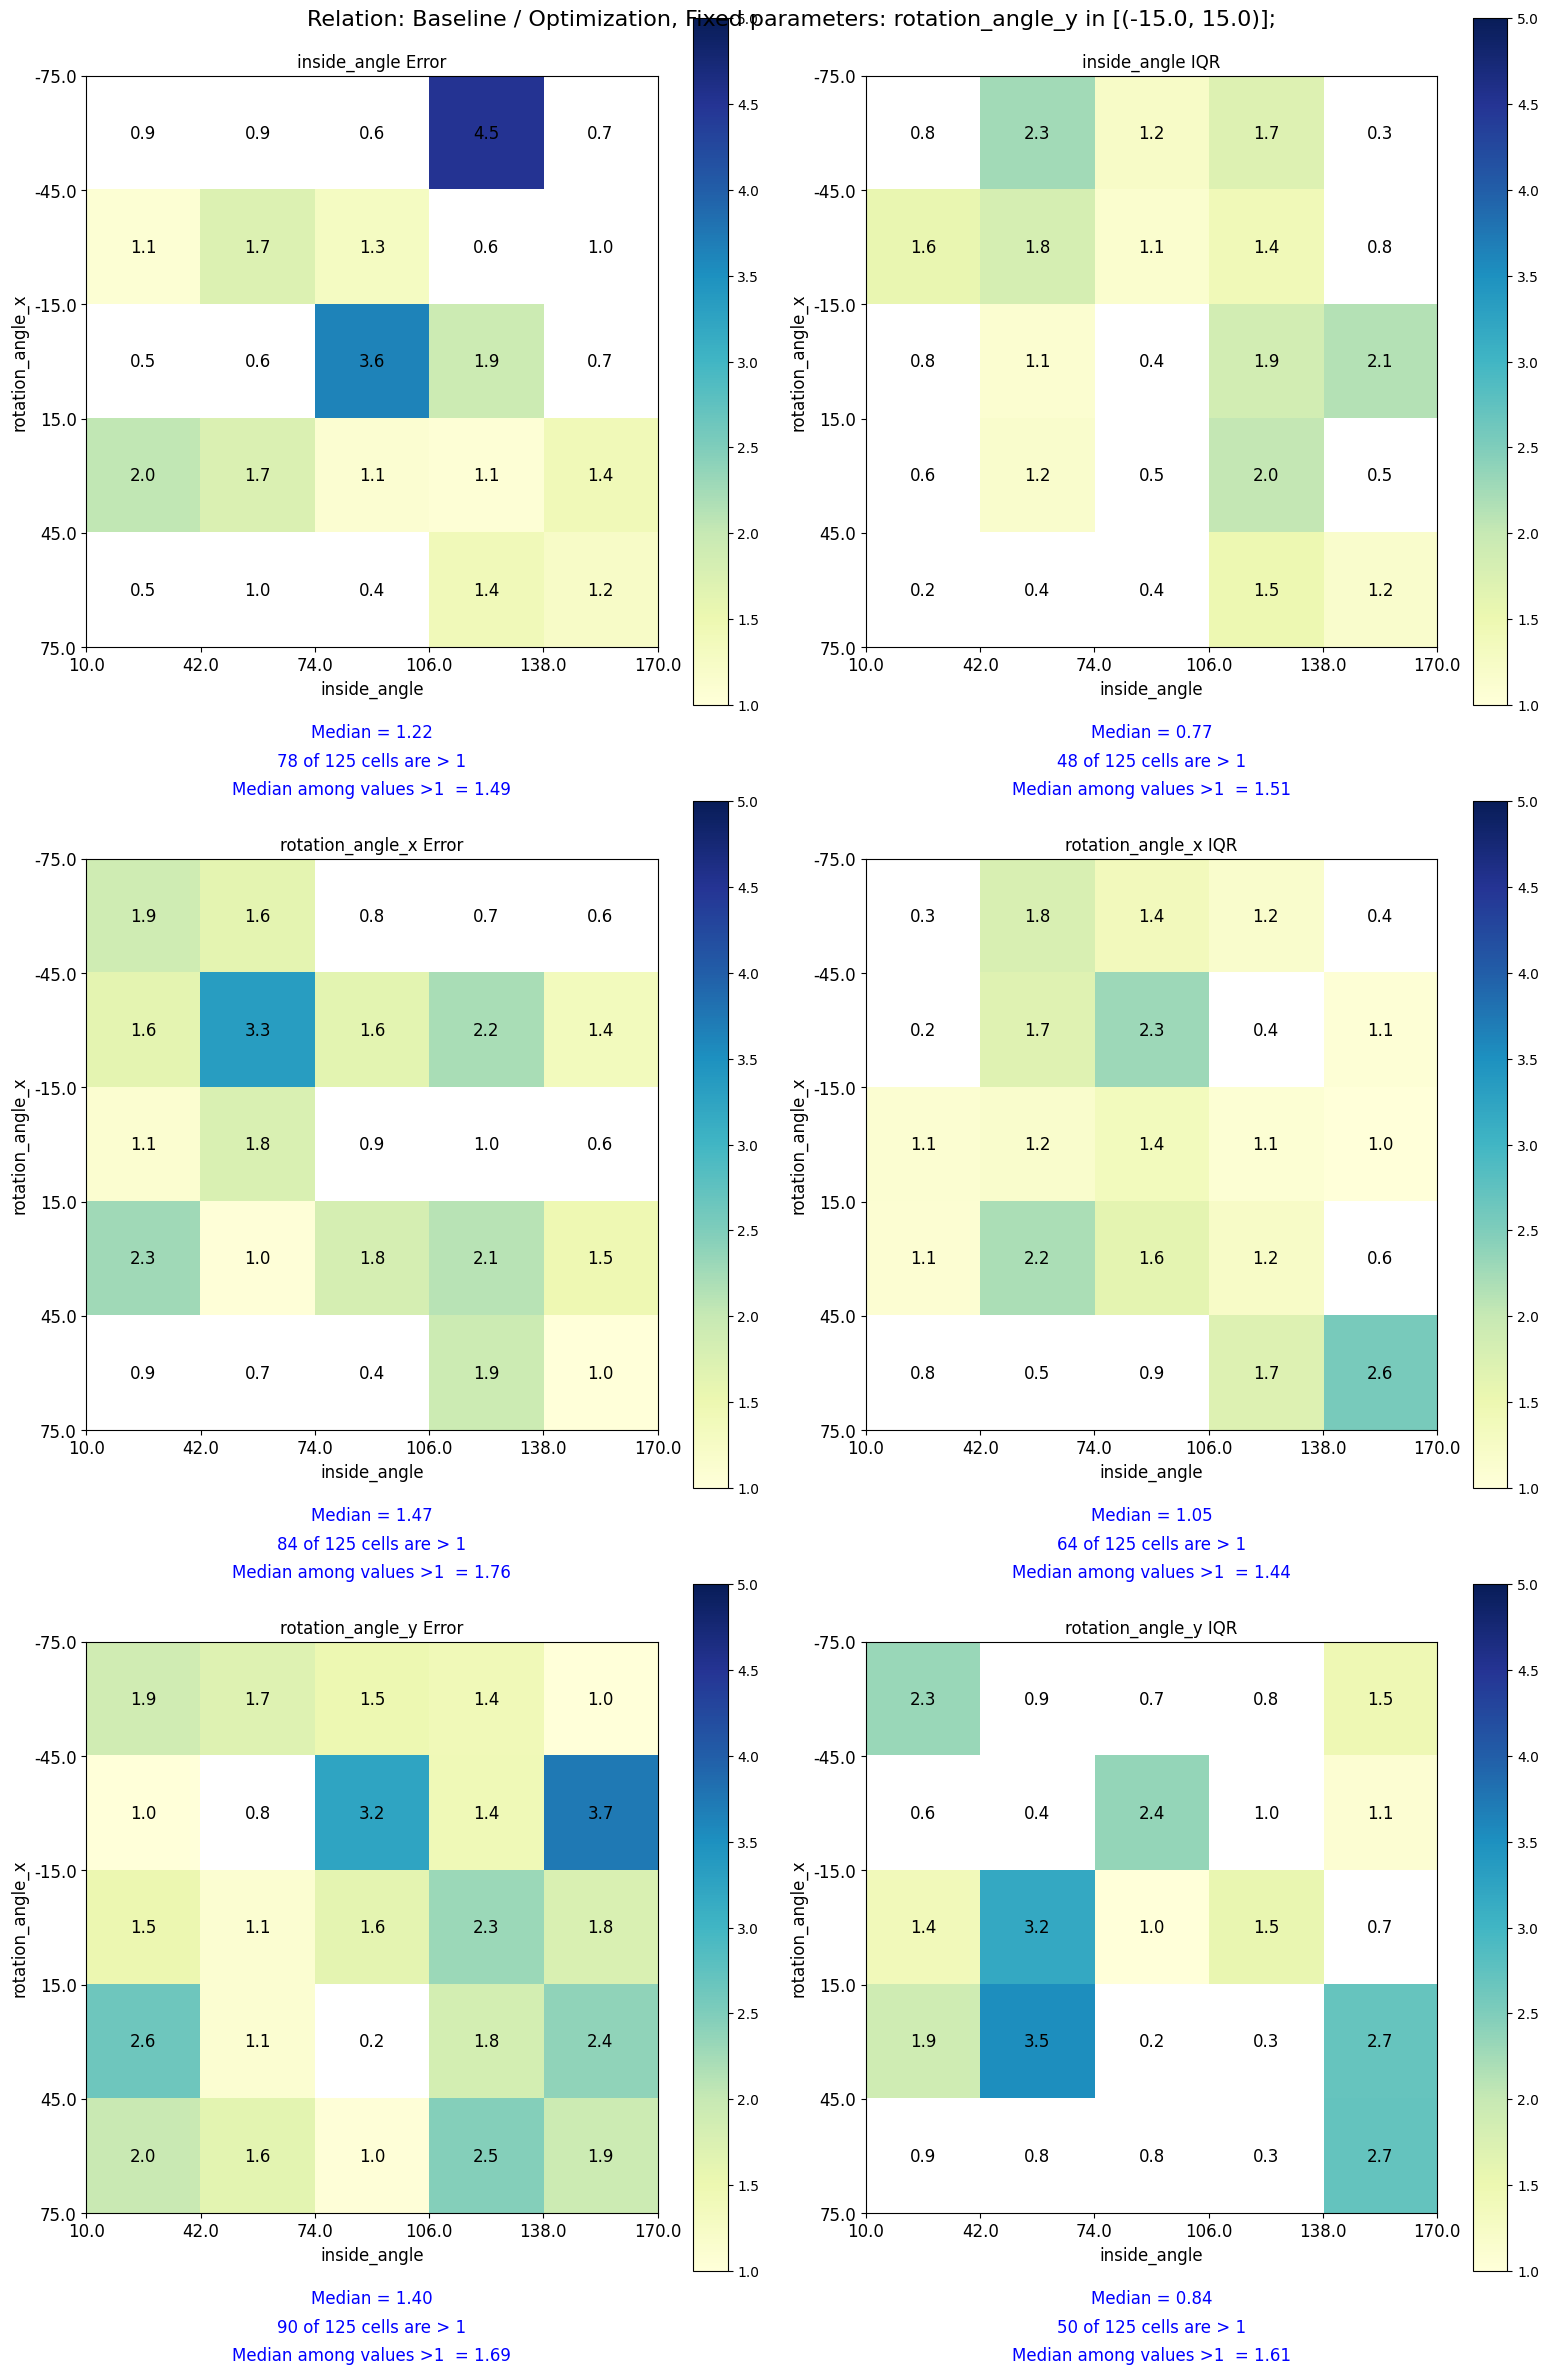

In [18]:
heatmap_lw = 0
heatmap_up=10
fixed_params = {2:2}
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, data['interval_runs'], title="Optimization", lw=heatmap_lw, up=heatmap_up, fixed_params_map=fixed_params)
# mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, filename="images/orig_angle_2d_base.png", title="Baseline", lw=heatmap_lw, up=heatmap_up, fixed_params_map=fixed_params)
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, data['interval_runs_base'] / data['interval_runs'], filename = f"images/orig_angle_2d_rel.png", title="Relation: Baseline / Optimization", lw=1, up=5, count_greater_than=1, fixed_params_map=fixed_params)